In [1]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#Rutas
path = 'Data/'

In [3]:
european_football = pd.read_csv(path+'european_football.csv', delimiter=';', 
                                decimal=',')

In [4]:
european_football.head(5)

,Div,Mes,Probabilidad,LocalVisitante,JuegaEuropa,MundialOEurocopa,GanaFavorito
0,P1,1,1.099989,1,1,0,1
1,P1,5,1.099989,1,1,0,1
2,P1,8,1.149954,1,1,0,1
3,P1,9,1.149954,1,1,0,1
4,P1,10,1.149954,1,1,0,1


In [5]:
european_football.dtypes

Div                  object
Mes                   int64
Probabilidad        float64
LocalVisitante        int64
JuegaEuropa           int64
MundialOEurocopa      int64
GanaFavorito          int64
dtype: object

In [30]:
dummies = pd.get_dummies(european_football, columns=['Div'])

In [31]:
dummies.head()

,Mes,Probabilidad,LocalVisitante,JuegaEuropa,MundialOEurocopa,GanaFavorito,Div_D1,Div_E0,Div_F1,Div_I1,Div_P1,Div_SP1
0,1,1.099989,1,1,0,1,0,0,0,0,1,0
1,5,1.099989,1,1,0,1,0,0,0,0,1,0
2,8,1.149954,1,1,0,1,0,0,0,0,1,0
3,9,1.149954,1,1,0,1,0,0,0,0,1,0
4,10,1.149954,1,1,0,1,0,0,0,0,1,0


In [32]:
columns = list(dummies.columns)

In [33]:
columns.remove('GanaFavorito')

In [34]:
columns

['Mes',
 'Probabilidad',
 'LocalVisitante',
 'JuegaEuropa',
 'MundialOEurocopa',
 'Div_D1',
 'Div_E0',
 'Div_F1',
 'Div_I1',
 'Div_P1',
 'Div_SP1']

### K NEAREST NEIGHBORS

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
X = dummies[columns].values

In [37]:
y = dummies["GanaFavorito"] #Hace 0 y 1

In [38]:
clf = KNeighborsClassifier(n_neighbors=150)

In [39]:
clf.fit(X, y) #entrenamos

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=150, p=2,
           weights='uniform')

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=150, p=2,
           weights='uniform')

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test, clf.predict(X_test))

0.57552019583843328

In [ ]:
#Vamos a ver en un gráfico, 

In [48]:
X2 = dummies[['LocalVisitante','Probabilidad']].values

In [49]:
h = .01
x_min, x_max = X2[:, 0].min() - 0.1, X2[:, 0].max() + .1
y_min, y_max = X2[:, 1].min() - .1, X2[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.scatter(xx,yy, c=Z)
plt.xlabel('Cuota')
plt.ylabel('Mes')

ValueError: query data dimension must match training data dimension

In [21]:
#Crossval score: para reorganizar y hacer el accuracy varias veces, así será más acertado el accuracy

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
mean_accuracy = cross_val_score(clf,X,y, cv=10, scoring='accuracy')

In [52]:
mean_accuracy.mean()

0.57919742728774704

(array([ 1.,  1.,  0.,  1.,  1.,  2.,  2.,  0.,  1.,  1.]),
 array([ 0.53419494,  0.5425853 ,  0.55097566,  0.55936603,  0.56775639,
         0.57614676,  0.58453712,  0.59292748,  0.60131785,  0.60970821,
         0.61809857]),
 <a list of 10 Patch objects>)

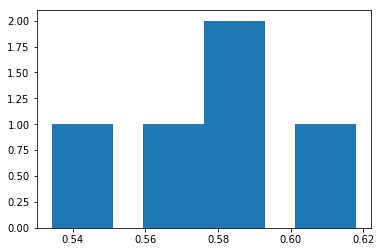

In [53]:
plt.hist(mean_accuracy) #Para ver los distintos accuracies que tiene el modelo

In [ ]:
#Vamos a analizar cuantos vecinos son los mejores para el modelo

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
clf2 = GridSearchCV(estimator = KNeighborsClassifier(n_neighbors=1), param_grid={'n_neighbors':np.arange(1,200)})

In [ ]:
clf2.fit(X,y)

In [79]:
clf2.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create the estimator and train it
clf = DecisionTreeClassifier(max_depth=5) #min_Samples_leaf=30

In [ ]:
clf.fit(X,y)

In [ ]:
#Hacer el train y el test

In [ ]:
h = .01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.scatter(xx, yy,c=Z)
plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow")
plt.show()

In [ ]:
clf1 =GridSearchCV(estimator=DecisionTreeClassifier(min_samples_leaf=10), param_grid={'min_samples_leaf':np.arange(5,50)})

In [ ]:
clf1.fit(X,y)

In [ ]:
clf1.best_params_

In [ ]:
#Hacer el train y el test

In [ ]:
#Precision Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve

y_score = bclf.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_score)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [ ]:
#Curve ROC

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
actual = [1,1,1,0,0,0]
predictions = [0.9,0.9,0.9,0.1,0.1,0.1]

In [ ]:
alse_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(kernel ='linear')

In [ ]:
clf.fit(X,y)

In [ ]:
h = .01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(xx,yy, c=Z)

In [ ]:
plt.figure(figsize=(10,10))
    
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
#plt.plot(clf.)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color="none",edgecolor="blue",s=200)
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.show()

In [ ]:
clf = SVC(kernel='linear', C=0.1)
clf.fit(X,y)

In [ ]:
a = cross_val_score(clf,X,y, cv=10, scoring='accuracy')
a.mean()

In [ ]:
clf1= GridSearchCV(estimator=SVC(kernel='poly', degree=5,C=1),param_grid={'degree':[2-20]})

In [ ]:
clf1.fit(X,y)

In [ ]:
import seaborn as sns

In [ ]:
df_cm = pd.DataFrame(
        confusion_matrix(nclf.predict(X_test),y_test), index=["fast","slow"], columns=["fast","slow"], 
    )
fig = plt.figure()
sns.heatmap(df_cm, annot=True, fmt="d")

![alt text](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg "Logo Title Text 1")